In [1]:
#GPU Test
import tensorflow

print(len(tensorflow.config.list_physical_devices('GPU')))

1


In [2]:
#Data and Library Imports
import pandas
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import to_categorical
import sklearn
import sklearn.model_selection, sklearn.compose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pandas.read_csv("cover_data.csv")
head = data.head(10)
 
#print(head)
#print(isinstance(data, pandas.DataFrame))

In [3]:
#Preprocessing

labels = data["class"]
#print(labels)

numeric_features = data.iloc[:, :-1]
features = pandas.get_dummies(numeric_features)

print(features.shape[1])

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.15, random_state=37)

print("Features_Train Shape: ", features_train.shape)
print("Features_Test Shape: ", features_test.shape)

scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

le = LabelEncoder()
columns = list(numeric_features.columns)

labels_train = le.fit_transform(labels_train)
labels_test = le.fit_transform(labels_test)

labels_train = to_categorical(labels_train, num_classes=len(columns))
labels_test = to_categorical(labels_test, num_classes=len(columns))

#print(features)

54
Features_Train Shape:  (493860, 54)
Features_Test Shape:  (87152, 54)


In [4]:
#Create Model
featureNum = features_train.shape[1]
print(featureNum)
print(labels_train.shape[1])

model = Sequential()
model.add(InputLayer(input_shape=(featureNum)))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(featureNum, activation="softmax"))

callback = EarlyStopping(monitor='loss', patience=2)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

54
54


In [5]:
#Train

history = model.fit(features_train, labels_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
30867/30867 [==============================] - 94s 3ms/step - loss: 0.6368 - accuracy: 0.7351
Epoch 2/20
30867/30867 [==============================] - 87s 3ms/step - loss: 0.5503 - accuracy: 0.7677
Epoch 3/20
30867/30867 [==============================] - 88s 3ms/step - loss: 0.5116 - accuracy: 0.7849
Epoch 4/20
30867/30867 [==============================] - 95s 3ms/step - loss: 0.4869 - accuracy: 0.7962
Epoch 5/20
30867/30867 [==============================] - 98s 3ms/step - loss: 0.4716 - accuracy: 0.8033
Epoch 6/20
30867/30867 [==============================] - 101s 3ms/step - loss: 0.4617 - accuracy: 0.8076
Epoch 7/20
30867/30867 [==============================] - 102s 3ms/step - loss: 0.4547 - accuracy: 0.8113
Epoch 8/20
30867/30867 [==============================] - 106s 3ms/step - loss: 0.4484 - accuracy: 0.8144
Epoch 9/20
30867/30867 [==============================] - 107s 3ms/step - loss: 0.4424 - accuracy: 0.8163
Epoch 10/20
30867/30867 [==========================

dict_keys(['loss', 'accuracy'])


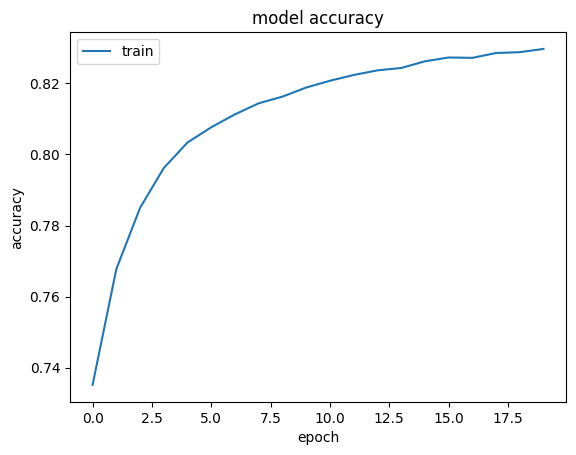

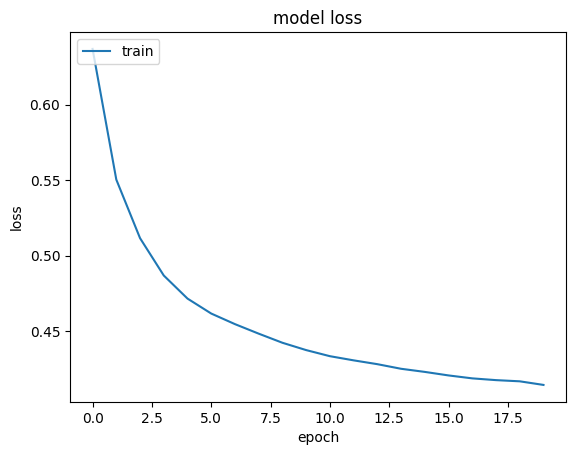

In [20]:
#Display History For Accuracy and Loss
import matplotlib.pyplot

%matplotlib inline

#print(history.history)
print(history.history.keys())
#print(history.history['val_loss'])
#print(history.history["accuracy"])


matplotlib.pyplot.plot(history.history['accuracy'])
matplotlib.pyplot.title('model accuracy')
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper left')
matplotlib.pyplot.show()


matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper left')
matplotlib.pyplot.show()
